In [10]:
import joblib
import pandas as pd

In [11]:
le_gender = joblib.load('le_gender.pkl')
le_category = joblib.load('le_category.pkl')
le_state = joblib.load('le_state.pkl')
scaler = joblib.load('scaler.pkl')
time_map = joblib.load('time_map.pkl')
x_test = joblib.load('x_test.pkl')
y_test = joblib.load('y_test.pkl')

rf_model_smote = joblib.load('rf_model_smote.pkl')
lr_model_smote = joblib.load('lr_model_smote.pkl')

df = pd.read_csv('sample_data2.csv')
df.head()

,category,gender,amt,age_years,city_pop,state,time_period,is_weekend,is_fraud
0,gas_transport,M,71.80,55.1,418884,SD,Morning,1,0
1,misc_pos,M,65.02,77.5,37559,MO,Evening,1,0
2,gas_transport,M,96.31,23.5,138841,MA,Evening,0,0
3,misc_pos,F,141.73,43.1,220921,RI,Late Night,1,0
4,shopping_pos,M,17.30,77.2,214988,IL,Afternoon,0,0


In [12]:
known_states = set(le_state.classes_)
df = df[df['state'].isin(known_states)]

# Encode time-related features
df['time_period'] = df['time_period'].map(time_map)

# Encode categorical variables
df['gender'] = le_gender.transform(df['gender'])
df['category'] = le_category.transform(df['category'])
df['state'] = le_state.transform(df['state'])

# Scale numerical features
df[['city_pop', 'amt', 'age_years']] = scaler.transform(
    df[['city_pop', 'amt', 'age_years']]
)

df.head()

,category,gender,amt,age_years,city_pop,state,time_period,is_weekend,is_fraud
0,2,1,0.003110,0.430884,0.144103,40,0,1,0
1,9,1,0.002812,0.709838,0.012914,23,2,1,0
2,2,1,0.004186,0.037360,0.047758,18,2,0,0
3,9,0,0.006181,0.281445,0.075997,38,3,1,0
4,12,1,0.000716,0.706102,0.073956,13,1,0,0


In [13]:
features = ['gender', 'age_years', 'state', 'city_pop', 'category', 'amt', 'time_period', 'is_weekend']
prob_lr = lr_model_smote.predict_proba(df[features])[:, 1]
df_predict = df.copy()
df_predict['fraud_probability_lr'] = prob_lr
df_predict

,category,gender,amt,age_years,city_pop,state,time_period,is_weekend,is_fraud,fraud_probability_lr
0,2,1,0.003110,0.430884,0.144103,40,0,1,0,0.028113
1,9,1,0.002812,0.709838,0.012914,23,2,1,0,0.316615
2,2,1,0.004186,0.037360,0.047758,18,2,0,0,0.303755
3,9,0,0.006181,0.281445,0.075997,38,3,1,0,0.605205
4,12,1,0.000716,0.706102,0.073956,13,1,0,0,0.148552
...,...,...,...,...,...,...,...,...,...,...
495,0,1,0.000934,0.660025,0.168725,11,3,0,1,0.621568
496,10,1,0.003958,0.169365,0.002553,2,1,0,0,0.141413
497,3,0,0.003190,0.521793,0.113861,36,2,0,0,0.385230
498,12,0,0.000608,0.186800,0.114395,3,0,0,0,0.051342


In [14]:
features = ['gender', 'age_years', 'state', 'city_pop', 'category', 'amt', 'time_period', 'is_weekend']
prob_rf = rf_model_smote.predict_proba(df[features])[:, 1]

df_predict['fraud_probability_rf'] = prob_rf

df_predict

,category,gender,amt,age_years,city_pop,state,time_period,is_weekend,is_fraud,fraud_probability_lr,fraud_probability_rf
0,2,1,0.003110,0.430884,0.144103,40,0,1,0,0.028113,0.08
1,9,1,0.002812,0.709838,0.012914,23,2,1,0,0.316615,0.04
2,2,1,0.004186,0.037360,0.047758,18,2,0,0,0.303755,0.02
3,9,0,0.006181,0.281445,0.075997,38,3,1,0,0.605205,0.33
4,12,1,0.000716,0.706102,0.073956,13,1,0,0,0.148552,0.05
...,...,...,...,...,...,...,...,...,...,...,...
495,0,1,0.000934,0.660025,0.168725,11,3,0,1,0.621568,0.30
496,10,1,0.003958,0.169365,0.002553,2,1,0,0,0.141413,0.05
497,3,0,0.003190,0.521793,0.113861,36,2,0,0,0.385230,0.09
498,12,0,0.000608,0.186800,0.114395,3,0,0,0,0.051342,0.03


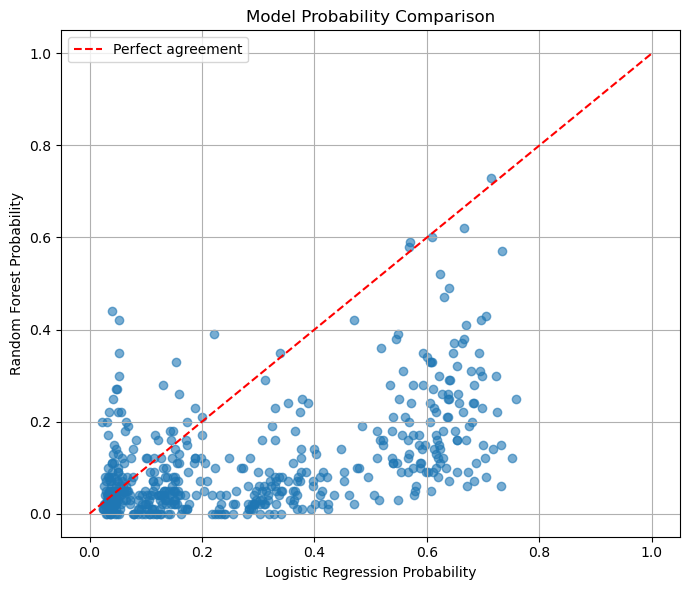

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))
plt.scatter(df_predict['fraud_probability_lr'], df_predict['fraud_probability_rf'], alpha=0.6)
plt.plot([0, 1], [0, 1], 'r--', label='Perfect agreement') 
plt.xlabel('Logistic Regression Probability')
plt.ylabel('Random Forest Probability')
plt.title('Model Probability Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

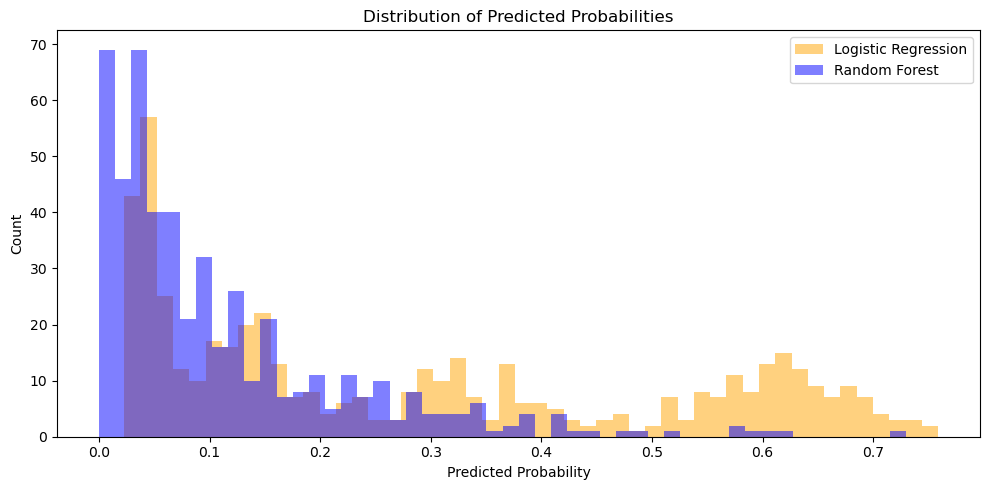

In [16]:
plt.figure(figsize=(10, 5))
plt.hist(prob_lr, bins=50, alpha=0.5, label='Logistic Regression', color='orange')
plt.hist(prob_rf, bins=50, alpha=0.5, label='Random Forest', color='blue')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.tight_layout()
plt.show()

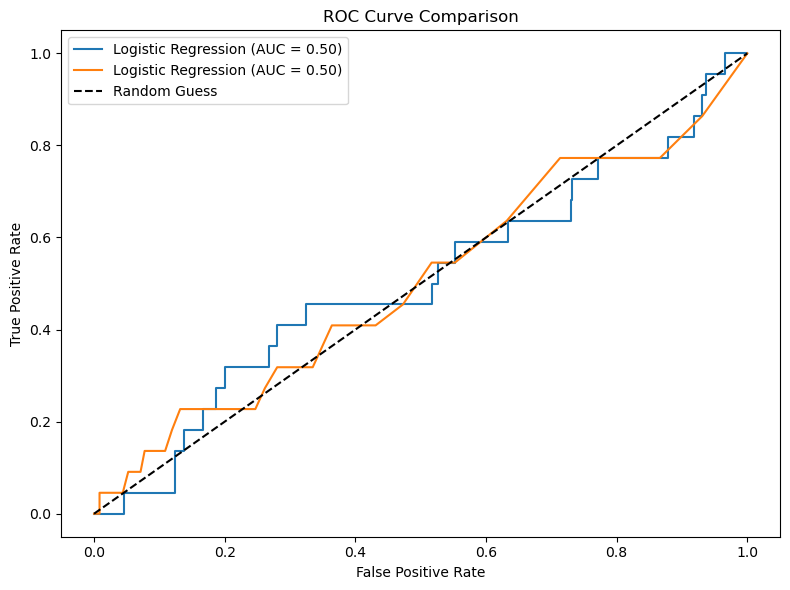

In [17]:
from sklearn.metrics import roc_curve, auc
y_true = df_predict['is_fraud']
y_score =df_predict['fraud_probability_lr']

fpr_lr, tpr_lr, _ = roc_curve(df_predict['is_fraud'], df_predict['fraud_probability_lr'])
fpr_rf, tpr_rf, _ = roc_curve(df_predict['is_fraud'], df_predict['fraud_probability_rf'])
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Logistic Regression (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.tight_layout()
plt.show()